# Time-series neuron spikes

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

In [2]:
def get_rms(signal): 
    return np.sqrt(np.sum(signal**2)/len(signal))

In [3]:
def generate_signal(T, dt, rms, limit, seed): 
    np.random.seed(seed)
    
    lenT = int(T/dt)
    t = np.linspace(0, T, lenT)
    dw = (2*np.pi)/T
    fs = np.arange(lenT) / T 
    omega = fs * 2.0 * np.pi
    # generate random signal that is normal distributed in time domain
    # sig = np.random.normal(0, 1, t.shape) # white noise 
    
    #  X(w) 
    positive_omega_size = int(omega.size/2)
    SIG_posw = np.random.normal(0, 1, size=(positive_omega_size,2)).view(np.complex128)
    SIG_negw = SIG_posw.conjugate()
    SIG = np.concatenate([SIG_negw, SIG_posw])[:,0]
    #print(SIG.shape)
    
    # fourier transform of the signal is: 
    # SIG = np.fft.rfft(sig) 
    
    # bandlimit the signal
    freq = fs
    filt = np.piecewise(freq, [freq <= limit, freq>limit], [lambda freq: 1, lambda freq: 0])
    filt[0] = 0
    SIG_filt = SIG*filt
    
    # get time domain signal
    sig_filt = np.fft.ifft(SIG_filt).real
    sig_f = sig_filt * (rms/get_rms(sig_filt))
    
    SIG_f = np.fft.fft(sig_f)
    SIG_f = abs(SIG_f)
    
    return sig_f, SIG_f, omega

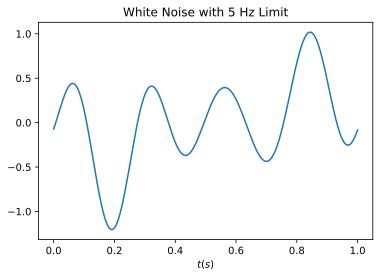

In [4]:
sig5, SIG5, omega = generate_signal(1, 0.001, 0.5, 5, seed=12)

plt.figure()
T = 1
dt = 0.001 
t = np.linspace(0, T, int(T/dt))
plt.plot(t, sig5)
plt.title('White Noise with 5 Hz Limit')
plt.xlabel('$t (s)$');

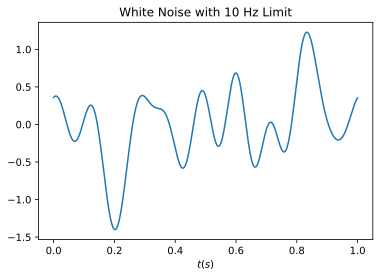

In [5]:
sig10, SIG10, omega = generate_signal(1, 0.001, 0.5, 10, seed=12)

plt.figure()
plt.plot(t, sig10)
plt.title('White Noise with 10 Hz Limit')
plt.xlabel('$t (s)$');

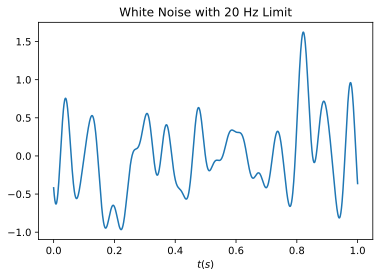

In [6]:
sig20, SIG20, omega = generate_signal(1, 0.001, 0.5, 20, seed=12)

plt.figure()
plt.plot(t, sig20)
plt.title('White Noise with 20 Hz Limit')
plt.xlabel('$t (s)$');

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

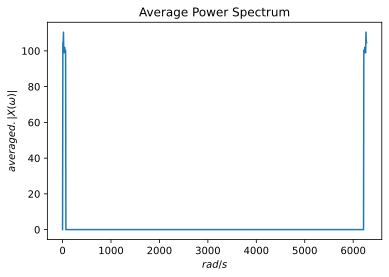

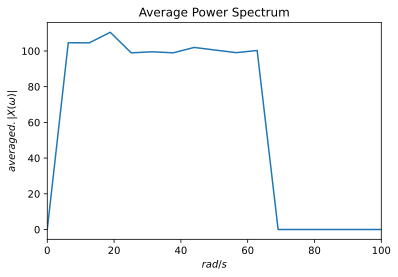

In [7]:
sum_x = np.zeros(SIG5.shape)

for i in range(101): 
    sig, SIG, omega = generate_signal(1, 0.001, 0.5, 10, i)
    sum_x += SIG 

avg = sum_x/100

plt.figure()
plt.plot(omega, avg)
plt.title('Average Power Spectrum')
plt.ylabel('$averaged. |X(\omega)|$')
plt.xlabel('$rad/s$');

## zoom in on rad/s 0-5 
plt.figure()
plt.plot(omega, avg)
plt.xlim(0, 100)
plt.title('Average Power Spectrum')
plt.ylabel('$averaged. |X(\omega)|$')
plt.xlabel('$rad/s$');

## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

In [8]:
def generate_signal_bandwidth(T, dt, rms, bandwidth, seed): 
    np.random.seed(seed)
    
    lenT = int(T/dt)
    t = np.linspace(0, T, lenT)
    dw = (2*np.pi)/T
    fs = np.arange(lenT) / T 
    omega = fs * 2.0 * np.pi
    
    #  X(w) 
    positive_omega_size = int(omega.size/2)
    SIG_posw = np.random.normal(0, 1, size=(positive_omega_size,2)).view(np.complex128)
    SIG_negw = SIG_posw.conjugate()
    SIG = np.concatenate([SIG_negw, SIG_posw])[:,0]
    #print(SIG.shape)
    
    # bandlimit the signal with limit in normal distribution
    filt = np.exp((-fs**2)/(2*bandwidth**2)) 
    filt[0] = 0
    SIG_filt = SIG*filt
    
    # get time domain signal
    sig_filt = np.fft.ifft(SIG_filt).real
    sig_f = sig_filt * (rms/get_rms(sig_filt))
    
    SIG_f = np.fft.fft(sig_f)
    SIG_f = abs(SIG_f)
    
    return sig_f, SIG_f, omega 

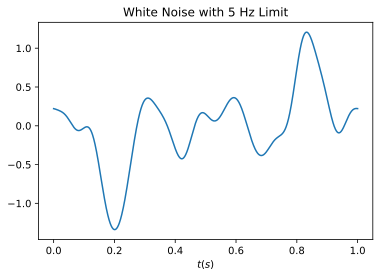

In [9]:
sig5_b, SIG5_b, freq_b = generate_signal_bandwidth(1, 0.001, 0.5, 5, 12)

plt.figure()
T = 1
dt = 0.001 
t = np.linspace(0, T, int(T/dt))
plt.plot(t, sig5_b)
plt.title('White Noise with 5 Hz Limit')
plt.xlabel('$t (s)$');

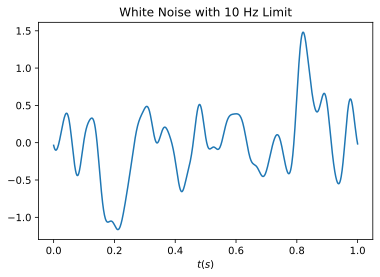

In [10]:
sig10_b, SIG10_b, freq = generate_signal_bandwidth(1, 0.001, 0.5, 10, seed=12)

plt.figure()
plt.plot(t, sig10_b)
plt.title('White Noise with 10 Hz Limit')
plt.xlabel('$t (s)$');

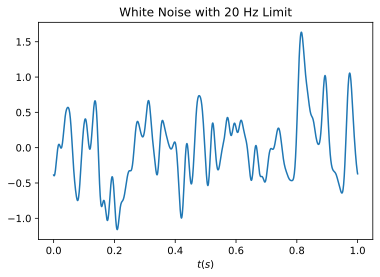

In [11]:
sig20_b, SIG20_b, omega = generate_signal_bandwidth(1, 0.001, 0.5, 20, seed=12)

plt.figure()
plt.plot(t, sig20_b)
plt.title('White Noise with 20 Hz Limit')
plt.xlabel('$t (s)$');

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

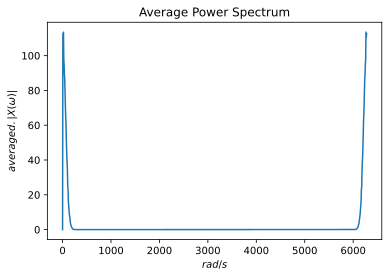

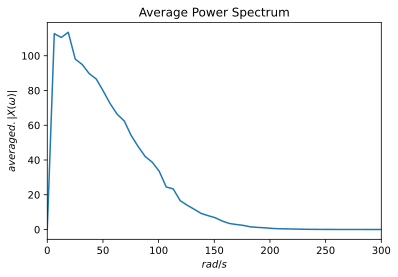

In [12]:
sum_x = np.zeros(SIG5.shape)

for i in range(101): 
    sig, SIG, freq = generate_signal_bandwidth(1, 0.001, 0.5, 10, i)
    sum_x += SIG 

avg = sum_x/100

plt.figure()
plt.plot(omega, avg)
plt.title('Average Power Spectrum')
plt.ylabel('$averaged. |X(\omega)|$')
plt.xlabel('$rad/s$');

## zoom in on rad/s 0-10
plt.figure()
plt.plot(omega, avg)
plt.xlim(0, 300)
plt.title('Average Power Spectrum')
plt.ylabel('$averaged. |X(\omega)|$')
plt.xlabel('$rad/s$');

# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

In [13]:
def LIFcurve(tau_ref, tau_rc, J):
    A = np.zeros(J.shape)
    for x, j in enumerate(J): 
        A[x] = (tau_ref - (tau_rc*np.log(1-j**(-1))))**(-1) if (j > 1) else 0
    return A

class singleNeuron():
    T = 0
    dt = 0.001
    encoder = 1
    x = np.linspace(0,1,int(1/dt))
    time = 0
    
    # LIF params 
    alpha = 0
    j_bias = 0
    J = 0
    a = 0
    V = 0
    dV = 0
    tau_rc = 0
    tau_ref = 0
    spikes = 0
    
    def __init__(self, T, tau_rc, tau_ref, dt, encoder):
        # initialize lif neuron params 
        self.encoder = encoder
        self.T = T
        self.dt = dt
        self.tau_rc = tau_rc
        self.tau_ref = tau_ref
        self.time = np.linspace(0,T,int(T/dt))
    
        # set the maximum & minumum firing rate
        maxFR = 150/(2*np.pi)
        minFR = 40/(2*np.pi)
        
        # calculate jbias and alpha given the max and min firing rates
        # for x = 0, firing rate = 40 (where j-bias occurs)
        self.j_bias = 1/(1-np.exp((tau_ref-1/minFR)/tau_rc))
        
        # for x = 1, max firing rate occur (a_max=G[J]) and 𝑎=J(1)-𝐽𝑏𝑖𝑎𝑠 
        self.alpha = 1/(1-np.exp((tau_ref-1/maxFR)/tau_rc)) - self.j_bias
        
        # set J 
        self.J = self.getJ(self.x)
        
        # Calculate the firing rate as a function of current
        self.a = LIFcurve(tau_ref, tau_rc, self.J) * 2*np.pi 
        
    def getJ(self, x):
        J = self.encoder * self.alpha * x + self.j_bias
        return J
        
    def spikeTrain(self, x):
        n = int(self.T/self.dt)
        if isinstance(x, int):
            # if input signal is constant, fill with same value 
            j = np.full([n], self.getJ(x)) 
        else:
            j = self.getJ(x)                
        
        # initialize our Spikes, Voltage and dV functions
        self.V = np.zeros(n)
        self.spikes = np.zeros(n)
        self.V[0] = 0
        self.dV = np.zeros(n)
        # Calculate dV and V for each time step 
        for i in range(0,n):
             # calculate dV (change in V) given the previous V 
            self.dV[i] = 2*np.pi/self.tau_rc * (j[i] - self.V[i]) * self.dt  
            if i < len(self.V)-1: 
                 # calculate next V given dV and previous V
                self.V[i+1] = self.V[i] + self.dV[i]
                # if the next V will be over 1, we spike and set V to 0
                if self.V[i+1] >= 1:                                          
                    self.V[i+1] = 0
                    self.spikes[i] = 1         
        return self.spikes

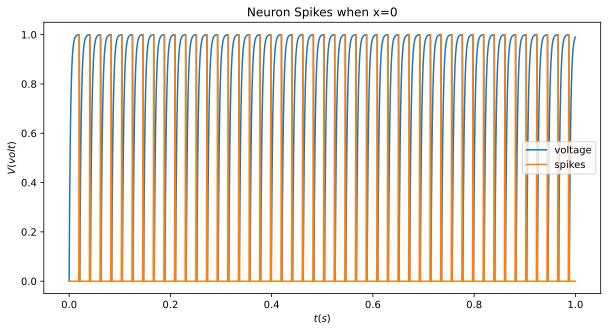

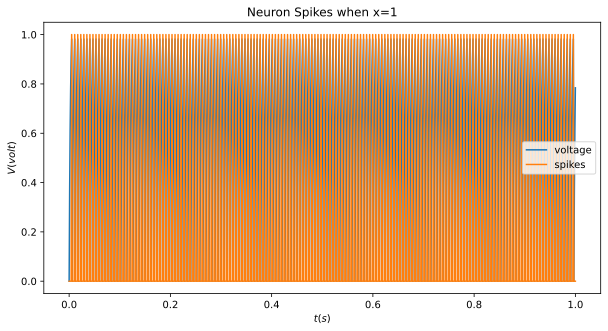

In [14]:
# tau_rc = 0.02, tau_ref = 0.002, encoder = 1 from question description
neu = singleNeuron(T = 1,  dt = 0.001, tau_rc = 0.02, tau_ref = 0.002, encoder = 1)

neu.spikeTrain(x=0) 

plt.figure(figsize = (10,5))
plt.plot(neu.time, neu.V, label="voltage")
plt.plot(neu.time, neu.spikes, label="spikes")
plt.title('Neuron Spikes when x=0')
plt.legend(loc='best')
plt.ylabel("$V (volt)$")
plt.xlabel("$t (s)$");

neu.spikeTrain(x=1)

plt.figure(figsize = (10,5))
plt.plot(neu.time, neu.V, label="voltage")
plt.plot(neu.time, neu.spikes, label="spikes")
plt.title('Neuron Spikes when x=1')
plt.legend(loc='best')
plt.ylabel("$V (volt)$")
plt.xlabel("$t (s)$");

**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

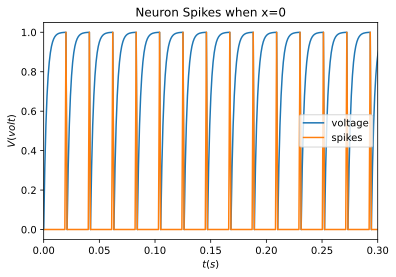

In [15]:
neu.spikeTrain(x=0)

plt.figure()
plt.plot(neu.time, neu.V, label="voltage")
plt.plot(neu.time, neu.spikes, label="spikes")
plt.xlim(0,0.3)
plt.title('Neuron Spikes when x=0')
plt.legend(loc='best')
plt.ylabel("$V (volt)$")
plt.xlabel("$t (s)$"); 

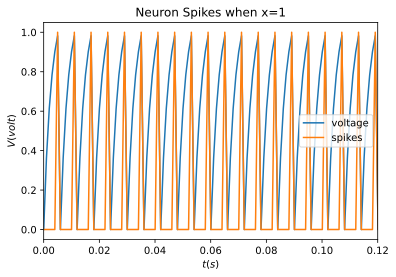

In [16]:
neu.spikeTrain(x=1)

plt.figure()
plt.plot(neu.time, neu.V, label="voltage")
plt.plot(neu.time, neu.spikes, label="spikes")
plt.xlim(0,0.12)
plt.title('Neuron Spikes when x=1')
plt.legend(loc='best')
plt.ylabel("$V (volt)$")
plt.xlabel("$t (s)$");

The observed number of spikes in previous part does not match the expected number of spikes for $x=0$ and $x=1$. For $x=0$, the firing rate observed is around 45Hz (9 spikes in 0.2s interval), while the expected is 50Hz. For $x=0$, the firing rate observed is around 167 Hz (20 spikes in 0.12s), while the expected is 150Hz. This might happen because the voltage is calculated by multiplying the $dv/dt$ with time step, which means it is not integrated as a continuous signal and may impact the accuracy. 

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

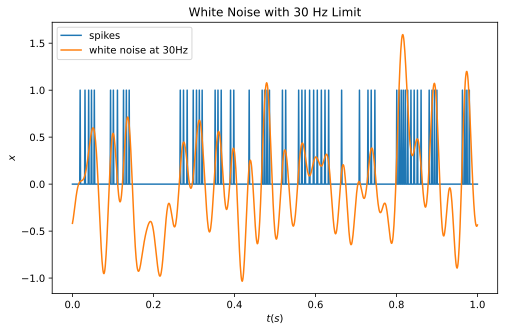

In [17]:
sig30, SIG30, freq = generate_signal(1, 0.001, 0.5, 30, seed=12) 

neu = singleNeuron(T = 1,  dt = 0.001, tau_rc = 0.02, tau_ref = 0.002, encoder = 1)
neu.spikeTrain(x=sig30) 

plt.figure(figsize = (8,5))
plt.plot(neu.time, neu.spikes, label="spikes")
plt.plot(t, sig30, label="white noise at 30Hz")
plt.title('Neuron Spikes when x=0')
plt.legend(loc='best')
plt.ylabel("$x$")
plt.xlabel("$t (s)$");

plt.title('White Noise with 30 Hz Limit')
plt.xlabel('$t (s)$');

**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

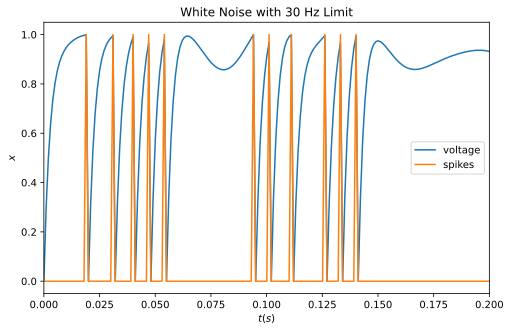

In [18]:
plt.figure(figsize = (8,5))
plt.plot(neu.time, neu.V, label="voltage")
plt.plot(neu.time, neu.spikes, label="spikes")
# plt.plot(t, sig30, label="white noise at 30Hz")
plt.xlim(0, 0.2)
plt.title('Neuron Spikes when x=0')
plt.legend(loc='best')
plt.ylabel("$x$")
plt.xlabel("$t (s)$");

plt.title('White Noise with 30 Hz Limit')
plt.xlabel('$t (s)$');

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

In [19]:
# ✍ <YOUR SOLUTION HERE>

# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

In [20]:
# Neuron Pair Class (extends singleNeuron)
class twoNeurons():
    pos_neu = 0
    neg_neu = 0
    def __init__(self, T, dt, tau_rc, tau_ref):
        self.pos_neu = singleNeuron(T = T, dt = dt, tau_rc = tau_rc, tau_ref = tau_ref, encoder = 1)
        # create the negative encoded single neuron
        self.neg_neu = singleNeuron(T = T, dt = dt, tau_rc = tau_rc, tau_ref = tau_ref, encoder = -1)
    
    def spikeTrains(self, x): 
        return self.pos_neu.spikeTrain(x), self.neg_neu.spikeTrain(x)
        
neupair = twoNeurons(T = 1, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) # create the neuron pair

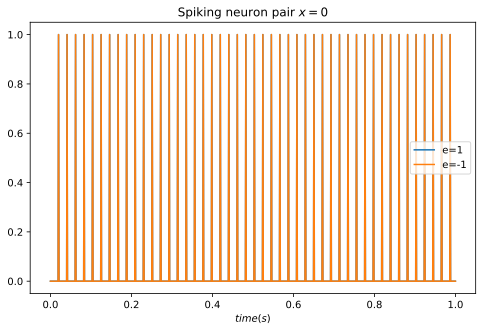

In [21]:
pos_neu, neg_neu = neupair.spikeTrains(x=0) # calculate the spike trains of both neurons

plt.figure(figsize = (8,5))
plt.plot(neupair.pos_neu.time, pos_neu, label='e=1')
plt.plot(neupair.neg_neu.time, neg_neu, label='e=-1')
plt.title('Spiking neuron pair $x=0$')
plt.xlabel('$time (s)$')
plt.legend(loc='best');

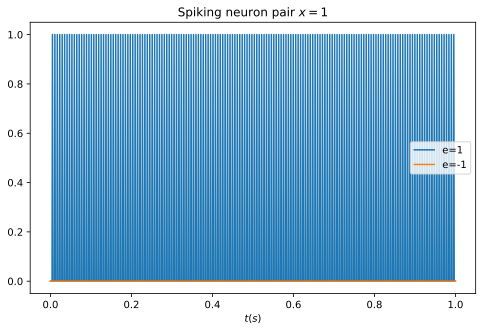

In [22]:
pos_neu_1, neg_neu_1 = neupair.spikeTrains(x=1) # calculate the spike trains of both neurons

plt.figure(figsize = (8,5))
plt.plot(neupair.pos_neu.time, pos_neu_1, label='e=1')
plt.plot(neupair.neg_neu.time, neg_neu_1, label='e=-1')
plt.title('Spiking neuron pair $x=1$')
plt.xlabel('$t (s)$')
plt.legend(loc='best');

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

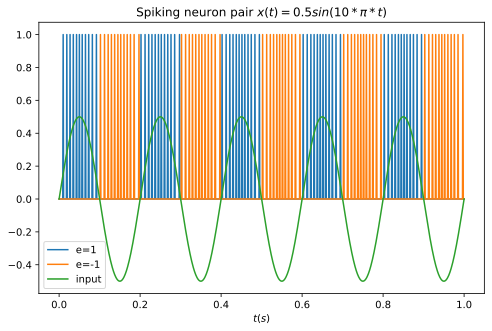

In [23]:
sin_input = 0.5*np.sin(10*np.pi*t)

pos_neu_sin, neg_neu_sin = neupair.spikeTrains(x=sin_input)
plt.figure(figsize = (8,5))
plt.plot(neupair.pos_neu.time, pos_neu_sin, label='e=1')
plt.plot(neupair.neg_neu.time, neg_neu_sin, label='e=-1')
plt.plot(t, sin_input, label='input')
plt.title('Spiking neuron pair $x(t)=0.5 sin(10*{\pi}*t)$')
plt.xlabel('$t (s)$')
plt.legend(loc='best');

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

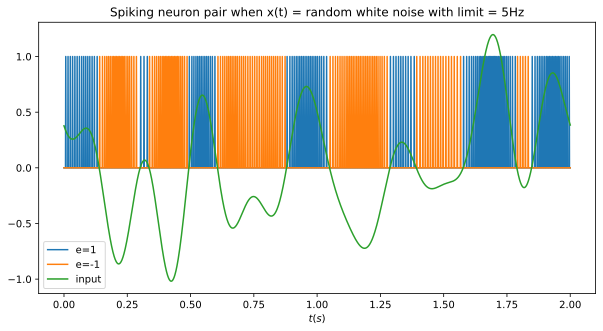

In [24]:
sig, SIG, freq = generate_signal(2, 0.001, 0.5, 5, seed=21) 

neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu_rand, neg_neu_rand = neupair.spikeTrains(x=sig)

plt.figure(figsize = (10,5))
plt.plot(neupair.pos_neu.time, pos_neu_rand, label='e=1')
plt.plot(neupair.neg_neu.time, neg_neu_rand, label='e=-1')
plt.plot(neupair.pos_neu.time, sig, label='input')
plt.title('Spiking neuron pair when x(t) = random white noise with limit = 5Hz')
plt.xlabel('$t (s)$')
plt.legend(loc='best');

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [25]:
def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # find length of signal, which is the number of time samples  
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # Find total time of which signal is computed for by multiplying number of signal point 
    # with time step between each sample. 
    T = Nt * dt

    # create time array with same length as input signal and
    # each element differ by 1 time step value, then shift the 
    # time array to the left by half of total simulated time. 
    ts = np.arange(Nt) * dt - T / 2.0

    # create frequency array with same length as input signal, then shift array to left by 
    # half of the highest frequency 
    fs = np.arange(Nt) / T - Nt / (2.0 * T) 

    # find angular frequency by multiplying 2pi with frequency array 
    omega = fs * 2.0 * np.pi

    # find difference between 2 spike trains, which is the response 1D array. 
    # response array convolute filter equals to decoded x signal. 
    r = spikes[0] - spikes[1]

    # R = find r in Fourier domain -> change r convolve h (filter) in time domain 
    # to R(w) times H(w) = decoded X(w)
    # Then shift the zero-frequency component to the center of the spectrum.
    R = np.fft.fftshift(np.fft.fft(r))

    # define sigma (standard deviation) in time domain
    sigma_t = 25e-3

    # define gaussian filter (window function) with designated sigma
    W2 = np.exp(-omega**2*sigma_t**2)

    # find normalized gaussian filter *****
    W2 = W2 / sum(W2)

    # signal in Fourier domain times with conjugate of the response R (Fourier domain) 
    CP = X*R.conjugate()

    # apply Gaussian filter (window function) to the optimal filter to eliminate noise 
    # (numerator of the optimal filter function)
    WCP = np.convolve(CP, W2, 'same')

    # |R(w)|^2 in denominator of the filter transfer function H
    RP = R*R.conjugate() 

    # apply windows filter to the magnitude of R 
    # (denominator of the optimal filter function)
    WRP = np.convolve(RP, W2, 'same')

    # |X(w)|^2
    XP = X*X.conjugate()

    # find window filtered XP
    WXP = np.convolve(XP, W2, 'same')

    # calculate optimal filter in Fourier domain
    H = WCP / WRP

    # find optimal filter in time domain and only keep real part 
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # decoded spike train = optimal filter times response function in Fourier domain
    XHAT = H*R

    # decoded spike train in time domain 
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP, r, RP

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

Text(0.5, 0, '$\\omega$')

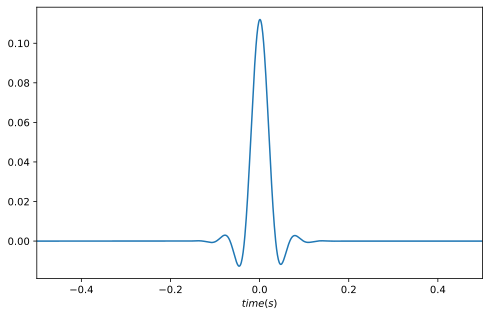

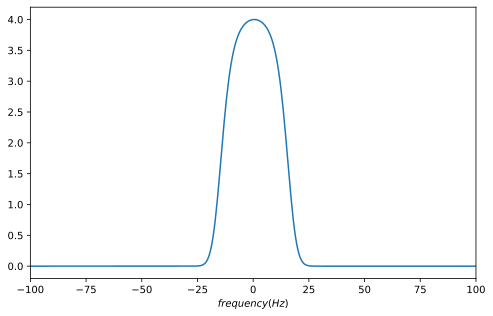

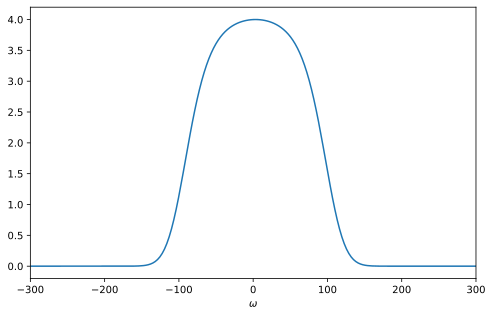

In [26]:
sig, SIG, freq = generate_signal(2, 0.001, 0.5, 5, seed=21) 
SIG = np.fft.fftshift(np.fft.fft(sig)) ####***fix in generate_signal


neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu_rand, neg_neu_rand = neupair.spikeTrains(x=sig)

ts, fs, R, H, h, XHAT, xhat, XP, WXP, r, RP = compute_optimal_filter(
        # Signal generated from your white noise generator
        sig,
        # Fourier coefficients from your white noise generator
        SIG,
        # Spike train from the previous part
        np.asarray([pos_neu_rand, neg_neu_rand]),
        # Time step size
        dt=1e-3
    ) 

plt.figure(figsize = (8,5))
plt.plot(ts, h)
plt.title('')
plt.xlim(-0.5, 0.5)
plt.xlabel('$time (s) $')

plt.figure(figsize = (8,5))
plt.plot(fs, H.real)
plt.xlim(-100, 100)
plt.title('')
plt.xlabel('$frequency (Hz)$')

w = fs * 2.0 * np.pi
plt.figure(figsize = (8,5))
plt.plot(w, H.real)
plt.xlim(-300, 300)
plt.title('')
plt.xlabel('$\omega$')

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

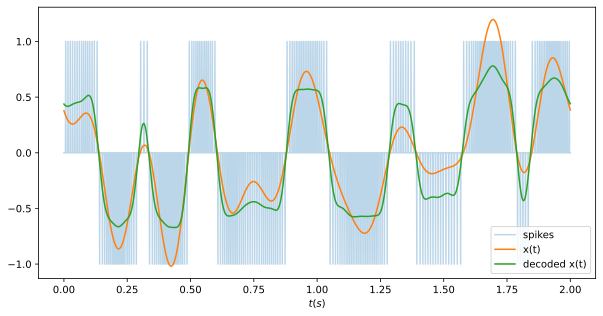

In [27]:
plt.figure(figsize = (10,5))
plt.plot(neupair.pos_neu.time, r, label='spikes', alpha=0.3)
plt.plot(neupair.pos_neu.time, sig, label='x(t)')
plt.plot(neupair.pos_neu.time, xhat, label='decoded x(t)')
plt.xlabel('$t (s)$')
plt.legend(loc='best');

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

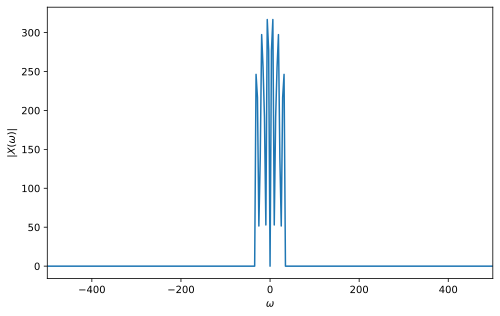

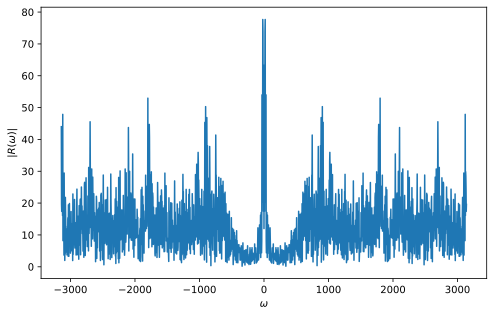

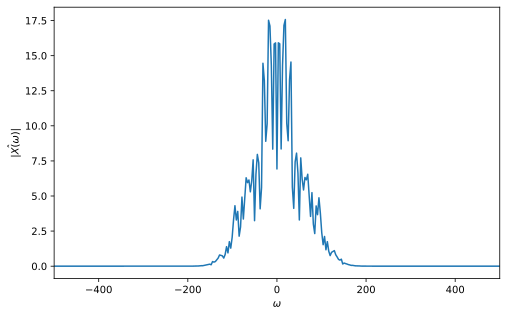

In [28]:
plt.figure(figsize = (8,5))
plt.plot(w, np.sqrt(XP.real))
plt.xlim(-500, 500)
plt.xlabel('${\omega} $')
plt.ylabel('$|X(\omega)|$')

plt.figure(figsize = (8,5))
plt.plot(w, np.sqrt(RP.real))
#plt.xlim(-100, 100)
plt.title('')
plt.xlabel('${\omega} $')
plt.ylabel('$|R(\omega)|$')

plt.figure(figsize = (8,5))
plt.plot(w, np.sqrt(np.sqrt(XHAT*XHAT.conjugate()).real))
plt.xlim(-500, 500)
plt.title('')
plt.xlabel('${\omega} $')
plt.ylabel('$|X\hat(\omega)|$');

**e) Discussion.** How do these spectra relate to the optimal filter?

The power spectra indicate the distribution of power into freqeuncy components composing that signal. For example for $|X(\omega)|$ and $|X\hat(\omega)|$, the power spectra is 0 other than $\omega$ in the range of -200 to 200, which means that the optimal filter filtered out the signal in all other frequency. The $|R(\omega)|$ power spectrum is the spike train's power density. 

**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

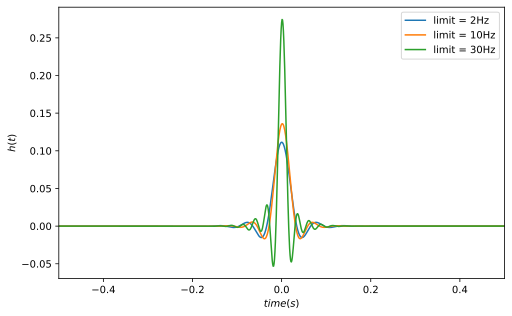

In [29]:
sig2Hz, SIG2Hz, freq = generate_signal(2, 0.001, 0.5, 2, seed=21) 
neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu, neg_neu = neupair.spikeTrains(x=sig2Hz)
ts2, fs, R, H, h2, XHAT, xhat, XP, WXP, r, RP = compute_optimal_filter(sig2Hz,
        np.fft.fftshift(np.fft.fft(sig2Hz)),
        np.asarray([pos_neu, neg_neu]),
        dt=1e-3) 

sig10Hz, SIG10Hz, freq = generate_signal(2, 0.001, 0.5, 10, seed=21) 
neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu, neg_neu = neupair.spikeTrains(x=sig10Hz)
ts10, fs, R, H, h10, XHAT, xhat, XP, WXP, r, RP = compute_optimal_filter(sig10Hz,
        np.fft.fftshift(np.fft.fft(sig10Hz)),
        np.asarray([pos_neu, neg_neu]),
        dt=1e-3) 

sig30Hz, SIG30Hz, freq = generate_signal(2, 0.001, 0.5, 30, seed=21) 
neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu, neg_neu = neupair.spikeTrains(x=sig30Hz)
ts30, fs, R, H, h30, XHAT, xhat, XP, WXP, r, RP = compute_optimal_filter(sig30Hz,
        np.fft.fftshift(np.fft.fft(sig30Hz)),
        np.asarray([pos_neu, neg_neu]),
        dt=1e-3) 

plt.figure(figsize = (8,5))
plt.plot(ts2, h2, label='limit = 2Hz')
plt.plot(ts10, h10, label='limit = 10Hz')
plt.plot(ts30, h30, label='limit = 30Hz')
plt.title('')
plt.xlim(-0.5, 0.5)
plt.ylabel('$h(t) $');
plt.xlabel('$time (s) $')
plt.legend(loc='best');

**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

As limit increase, the magnitude of the filter $h(t)$ increases. This happens because the signals to be filtered has increasing signals within a time frame when limit increases, and thus needs a larger magnitude when limit increases. 

# Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

In [30]:
def postSynapticFilter(n, tau, x):
    Nt = x.size
    dt = 0.001
    t = np.arange(Nt) * dt 
    
#     # Make sure that "spikes" is a 2 x Nt array
#     assert spikes.ndim == 2
#     assert spikes.shape[0] == 2              
#     assert spikes.shape[1] == Nt 
    
    # Create the filter
    h = t**n * np.exp(-t/tau)
    c = sum(h)
    h = h / c
    
    return h
    
h0 = postSynapticFilter(0, 0.007, sig10Hz)
h1 = postSynapticFilter(1, 0.007, sig10Hz)
h2 = postSynapticFilter(2, 0.007, sig10Hz)

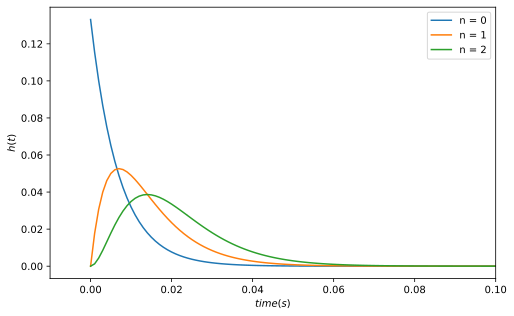

In [31]:
t = np.arange(sig10Hz.size) * 0.001
plt.figure(figsize = (8,5))
plt.plot(t, h0, label='n = 0')
plt.plot(t, h1, label='n = 1')
plt.plot(t, h2, label='n = 2')
plt.title('')
plt.xlim(-0.01, 0.1)
plt.ylabel('$h(t) $');
plt.xlabel('$time (s) $');
plt.legend(loc='best');

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

Decoded signal will have a smoother onset and delay when n increase (when n=0, there is a discontinuous spike onset). Higher n suppresses more of the content in higher frequency. 

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

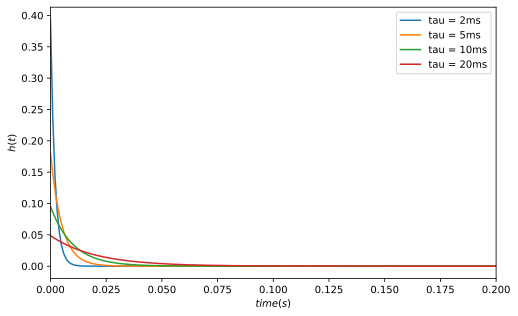

In [32]:
h0 = postSynapticFilter(0, 0.002, sig10Hz)
h1 = postSynapticFilter(0, 0.005, sig10Hz)
h2 = postSynapticFilter(0, 0.010, sig10Hz)
h3 = postSynapticFilter(0, 0.020, sig10Hz)

plt.figure(figsize = (8,5))
plt.plot(t, h0, label='tau = 2ms')
plt.plot(t, h1, label='tau = 5ms')
plt.plot(t, h2, label='tau = 10ms')
plt.plot(t, h3, label='tau = 20ms')
plt.title('')
plt.xlim(0, 0.2)
plt.ylabel('$h(t) $');
plt.xlabel('$time (s) $');
plt.legend(loc='best');

**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

Increasing $\tau$ would suppress more high-frequency content and output will be smoother. 

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

In [33]:
def identityDecoder(A, X):
    # find decoder D via least square 
    D = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T 
    return D

def decodeSpikesPostSynapticFilter(T, dt, n, tau, x, X, spikes):
    Nt = x.size
    dt = 0.001
    t = np.arange(Nt) * dt 
    
    # Create the filter 
    h = t**n * np.exp(-t/tau)
    c = sum(h)
    h = h / c
    
    H = np.fft.rfft(h)
    
    # frequency domain signal 
    SPIKES = [(np.fft.rfft(spikes[0])), (np.fft.rfft(spikes[1]))]
    
    # apply filter on frequency domain signal 
    FSPIKES = [H*SPIKES[0], H*SPIKES[1]]
    spikes_filt = [(np.fft.irfft((FSPIKES[0]))), (np.fft.irfft((FSPIKES[1])))]
    
    A = np.array(spikes_filt)
    
    #decode with identity decoder 
    d = identityDecoder(A, x)
        
    # Decode the spike train 
    xhat = d@A
    
    return t, h, x, xhat

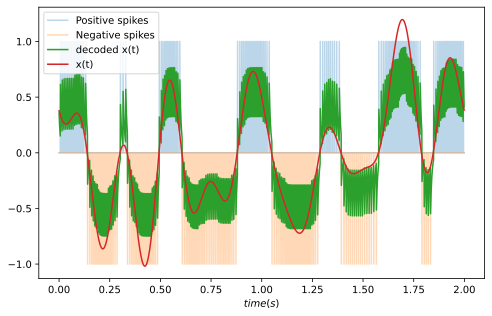

In [34]:
sig, SIG, freq = generate_signal(2, 0.001, 0.5, 5, seed=21) 

neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu, neg_neu = neupair.spikeTrains(x=sig)
spikes = np.asarray([pos_neu, neg_neu])

t, h, x, xhat = decodeSpikesPostSynapticFilter(2, 0.001, 0, 0.007, sig, SIG, spikes)

plt.figure(figsize = (8,5))
plt.plot(t, pos_neu, label='Positive spikes', alpha=0.3)
plt.plot(t, -1*neg_neu, label='Negative spikes',alpha=0.3)
plt.plot(t, xhat, label='decoded x(t)')
plt.plot(t, x, label='x(t)')
plt.title('')

plt.xlabel('$time (s) $');
plt.legend(loc='best');

**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

In [6]:
sig, SIG, freq = generate_signal(2, 0.001, 0.5, 2, seed=21) 

neupair = twoNeurons(T = 2, dt = 0.001, tau_rc = 0.02, tau_ref = 0.002) 
pos_neu, neg_neu = neupair.spikeTrains(x=sig)
spikes = np.asarray([pos_neu, neg_neu])

t, h, x, xhat = decodeSpikesPostSynapticFilter(2, 0.001, 0, 0.007, sig, SIG, spikes)

plt.figure(figsize = (8,5))
plt.plot(t, pos_neu, label='Positive spikes', alpha=0.3)
plt.plot(t, -1*neg_neu, label='Negative spikes',alpha=0.3)
plt.plot(t, xhat, label='decoded x(t)')
plt.plot(t, x, label='x(t)')
plt.title('')

plt.xlabel('$time (s) $');
plt.legend(loc='best');

NameError: name 'generate_signal' is not defined

**g) Discussion.** How do the decodings from e) and f) compare? Explain.

The decodings from e) and f) are similar but just that a lower frequency of the signals is observed. 

In [10]:
x_dict = {}

x_dict[2] = "kk"

In [14]:
x_dict.items().to_list()

AttributeError: 'dict_items' object has no attribute 'to_list'